In [ ]:
!pip install gdal > /dev/null

In [ ]:
import gdown
gdown.download("https://drive.google.com/file/d/1YUbTBFrk9QF0ivR5F640G3dhCMC3XQUZ/view?usp=sharing", "dataset.zip", quiet=False, fuzzy=True)
gdown.extractall("dataset.zip")

Downloading...
From: https://drive.google.com/uc?id=1YUbTBFrk9QF0ivR5F640G3dhCMC3XQUZ
To: /content/dataset.zip
100%|██████████| 1.70G/1.70G [00:20<00:00, 84.3MB/s]


['dataset/',
 'dataset/flooded/',
 'dataset/flooded/0.jpg',
 'dataset/flooded/1.jpg',
 'dataset/flooded/10.jpg',
 'dataset/flooded/100.jpg',
 'dataset/flooded/101.jpg',
 'dataset/flooded/102.jpg',
 'dataset/flooded/103.jpg',
 'dataset/flooded/104.jpg',
 'dataset/flooded/105.jpg',
 'dataset/flooded/106.jpg',
 'dataset/flooded/107.jpg',
 'dataset/flooded/108.jpg',
 'dataset/flooded/109.jpg',
 'dataset/flooded/11.jpg',
 'dataset/flooded/110.jpg',
 'dataset/flooded/111.jpg',
 'dataset/flooded/112.jpg',
 'dataset/flooded/113.jpg',
 'dataset/flooded/114.jpg',
 'dataset/flooded/115.jpg',
 'dataset/flooded/116.jpg',
 'dataset/flooded/117.jpg',
 'dataset/flooded/118.jpg',
 'dataset/flooded/119.jpg',
 'dataset/flooded/12.jpg',
 'dataset/flooded/120.jpg',
 'dataset/flooded/121.jpg',
 'dataset/flooded/122.jpg',
 'dataset/flooded/123.jpg',
 'dataset/flooded/124.jpg',
 'dataset/flooded/125.jpg',
 'dataset/flooded/126.jpg',
 'dataset/flooded/127.jpg',
 'dataset/flooded/128.jpg',
 'dataset/flooded/129

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from osgeo import gdal

In [ ]:
df = pd.DataFrame(columns=['image_path', 'label'])

for image_path in sorted(glob.glob('dataset/flooded/*.jpg')):
    data = {'image_path': image_path, 'label': 'flooded'}
    df.loc[len(df)] = data

for image_path in sorted(glob.glob('dataset/non-flooded/*.jpg')):
    data = {'image_path': image_path, 'label': 'non-flooded'}
    df.loc[len(df)] = data

In [ ]:
df.head()

,image_path,label
0,dataset/flooded/0.jpg,flooded
1,dataset/flooded/1.jpg,flooded
2,dataset/flooded/10.jpg,flooded
3,dataset/flooded/100.jpg,flooded
4,dataset/flooded/101.jpg,flooded


In [ ]:
print(f"Total number of instances in the dataset is: {len(df)}")
print(f"Total number of flooded instances in the dataset is: {len(df[df['label'] == 'flooded'])}")
print(f"Total number of non-flooded instances in the dataset is: {len(df[df['label'] == 'non-flooded'])}")

Total number of instances in the dataset is: 922
Total number of flooded instances in the dataset is: 461
Total number of non-flooded instances in the dataset is: 461


In [ ]:
def countPlot(data=None, x=None, y=None, palette='bright', height=15, title=' ', subtitle=' ', description=' '):
    sns.set(style = 'whitegrid', rc = {'figure.figsize': (20,height)})
    g = sns.countplot(data=data, y=y, x=x, palette=palette)
    g.set_ylabel(' \n\n\n')
    g.set_xlabel(' \n\n\n\n\n')
    g.set_title(f'\n\n\n\n{title}\n\n'.upper(), loc = 'left', fontdict = dict(fontsize = 15, fontweight = 'bold'))
    g.set_yticklabels(
        [tick_label.get_text().title() for tick_label in g.get_yticklabels()],
        fontdict = dict(
            fontsize = 12.5,
            fontweight = 'medium'))
    
    plt.text(s = f'{description}',
             alpha = 0.5,
             x = 0,
             y = -.18,
             verticalalignment = 'baseline',
             horizontalalignment = 'left',
             transform = g.transAxes)
    
    g.bar_label(container = g.containers[0], padding = 10,)
    plt.text(s = ' ', x = 1.08, y = 1, transform = g.transAxes)
    sns.despine()
    return g

def piePlot(data=None, value='Percentage', name='Class', title=' ', subtitle=' ', description=' '):
    data_pie = pd.DataFrame(data.value_counts() / data.shape[0]*100).reset_index()
    data_pie.columns = [name, value]
    fig = px.pie(data_pie, values=value, names=name, title=title)
    fig.update_layout(title=title, title_x=0.48)
    fig.show()

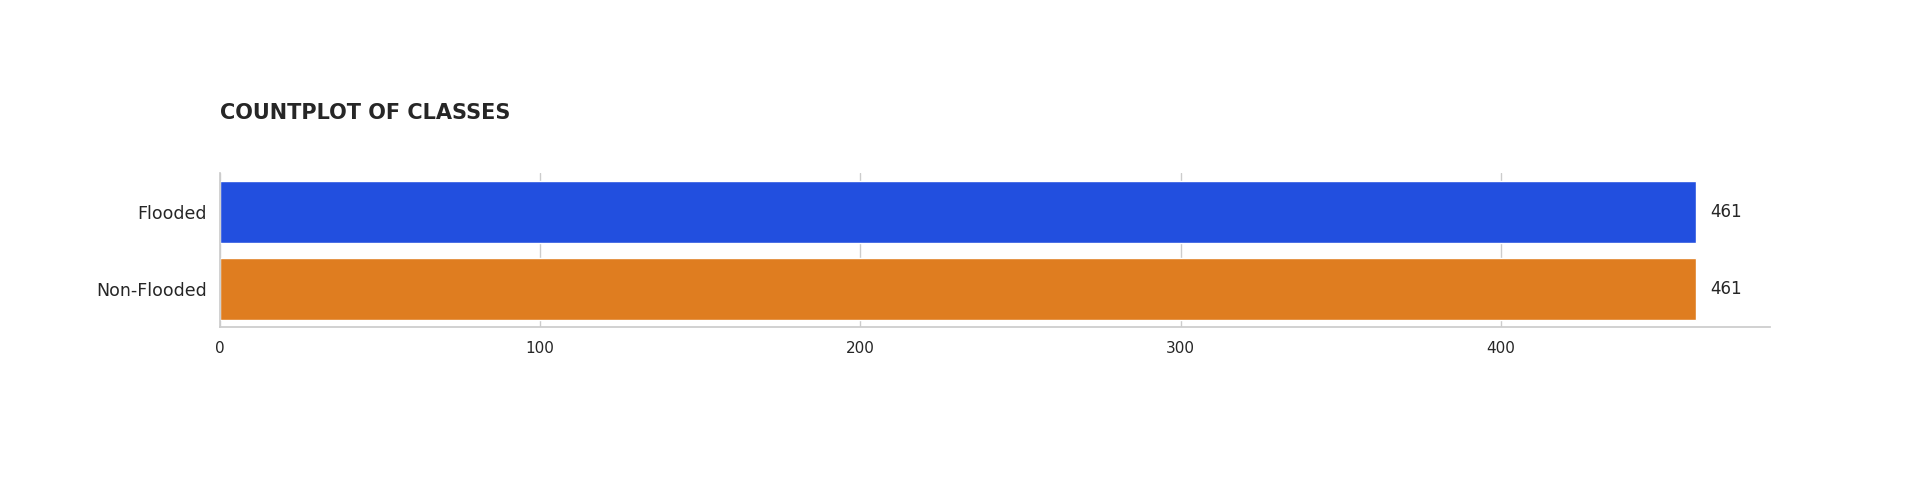

In [ ]:
countPlot(y = df['label'], title = 'Countplot of Classes', height = df['label'].nunique())
piePlot(data = df['label'], value = 'Percentage', name = 'Class', title = 'Class Distribution')

In [ ]:
img_ds = gdal.Open(df.iloc[555]['image_path'], gdal.GA_ReadOnly)
print ("Number of bands in the images is: " + str(img_ds.RasterCount))

Number of bands in the images is: 3


In [ ]:
resolutions = {}
for i in range(len(df)):
  image = cv2.imread(df.loc[i]['image_path'], cv2.IMREAD_COLOR)
  if image.shape not in resolutions:
    resolutions[image.shape] = 1
  else:
    resolutions[image.shape] += 1

In [ ]:
sorted_resolutions = dict(sorted(resolutions.items(), key=lambda x: x[1], reverse=True))
print(dict(list(sorted_resolutions.items())[0:5]))

{(3000, 4000, 3): 270, (3072, 4592, 3): 47, (720, 1280, 3): 8, (360, 640, 3): 7, (230, 230, 3): 5}


In [ ]:
sum = 0
for key in sorted_resolutions.keys():
  sum += sorted_resolutions[key]
assert sum == len(df)

In [ ]:
average_image_size = np.zeros((1, 3))
for key in sorted_resolutions.keys():
  average_image_size += key * np.full((1, 3), sorted_resolutions[key])

average_image_size /= len(df)
print(np.round(average_image_size).astype(int))

[[1352 1794    3]]
